# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Требуется определить рыночную стоимость объектов недвижимости, для этого требуется установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:
* `airports_nearest` — расстояние до ближайшего аэропорта (м);
* `balcony` — число балконов; 
* `ceiling_height` — высота потолков (м);
* `cityCenters_nearest` — расстояние до центра города (м);
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия);
* `first_day_exposition` — дата публикации;
* `floor` — этаж;
* `floors_total` — всего этажей в доме;
* `is_apartment` — апартаменты (булев тип);
* `kitchen_area` — площадь кухни (м²);
* `last_price` — цена на момент снятия с публикации;
* `living_area` — жилая площадь (м²);
* `locality_name` — название населённого пункта;
* `open_plan` — свободная планировка (булев тип);
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего парка (м);
* `ponds_around3000`— число водоёмов в радиусе 3 км;
* `ponds_nearest`— расстояние до ближайшего водоёма (м);
* `rooms` — число комнат;
* `studio` — студия (булев тип);
* `total_area` — общая площадь (м²);
* `total_images` — число фотографий квартиры в объявлении.

План работы: 

* Первичное знакомство с датасетом;
* Предобработка данных (удаление дубликатов, обработка пропусков и аномалий, изменение типа данных);
* Исследовательский анализ данных основных параметров жилых объектов;
* Изучение зависимости стоимости жилья от ряда параметров;
* Подсчет средней цены 1 м2 в 10 населённых пунктах с наибольшим числом объявлений;
* Вычислим среднюю цену каждого километра до центра СПб.

### Знакомоство с данными и их предобработка 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df.head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#посмотрим на типы данных и количество ненулевых значений 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

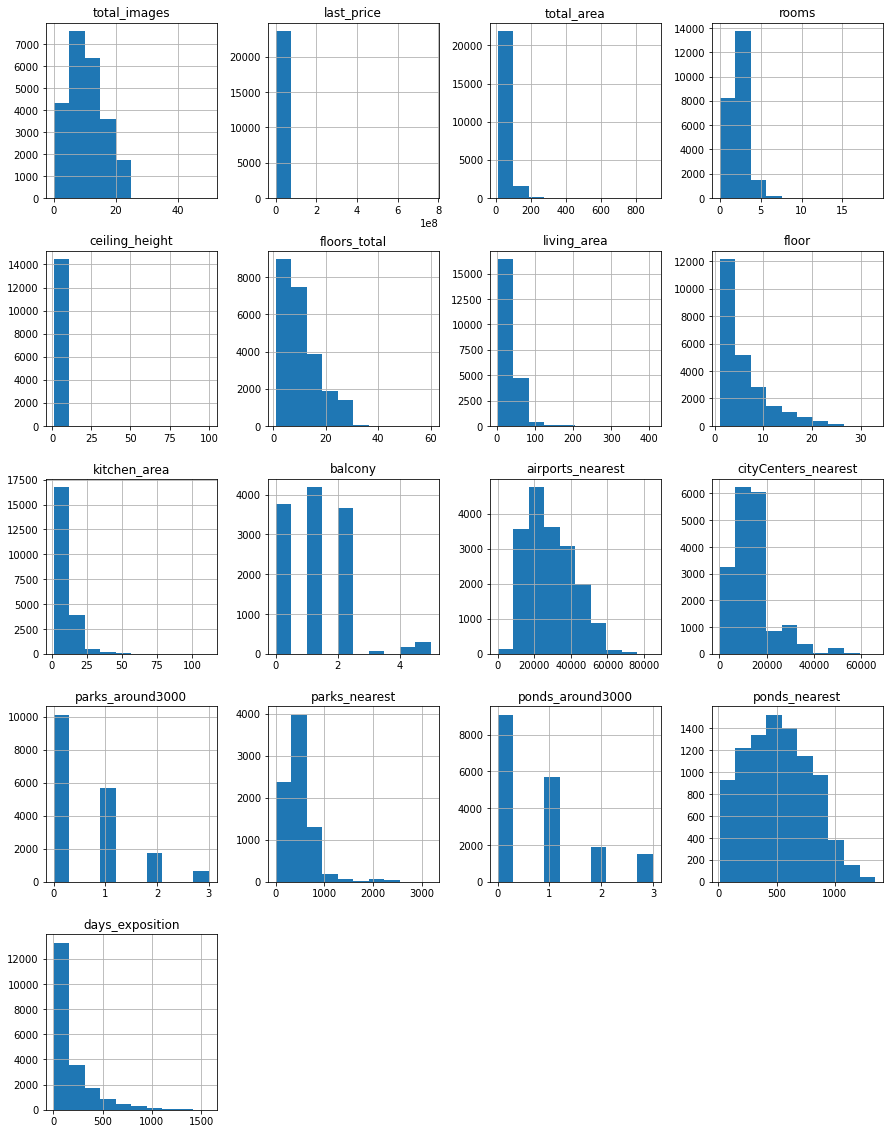

In [4]:
#построим общую гистограмму для всех столбцов 
df.hist(figsize=(15, 20));

Выводы: 
* Файл содержит данные по 23 699 объектам недвижимости, каждый из которых описывается 22 признаками (17 количественных, 4 категориальных и 1 временной). 
* Количество значений в столбцах различается, что говорит о пропущенных значениях, которые необходимо обработать.   
* Пропуски могут быть вызваны несколькими причинами. Во-первых, продавец мог счесть тот или иной признак незначимым и пропустить его намеренно. Во-вторых, он мог попросту не иметь информации для заполнения столбца. Кроме того, могла случиться техническая ошибка при заполнении данных. При пропусках или ошибках в данных, касаемо местоположения квартиры, могли возникнуть сбои при автоматическом заполнении столбцов, связанных с картографическими данными. 

Найдены столбцы, в которых нужно изменить тип данных: 
* `last_price`, `days_exposition`, `parks_around3000`, `ponds_around3000`, `floors_total`,`balcony` — в int64, поскольку представляется логичным для всех целочисленных по характеру данных применить тип данных int.
* `first_day_exposition` — в daytime, т.к. это временной признак. 
* `is_apartment` — в bool, т.к. это категориальный признак. 
 
В гистограмме `last_price` обнаружен странный пик около 0. Почти все значения собрались в одном столбце, по такой гистограмме ничего не скажешь. Судя по общей информации о данном столбце, сумма указана в у.е. Возможно, имеет смысл перевести ее в более удобный формат, например, в в млн. 

### Предобработка данных

План действий в данном разделе таков: 

Удаление пропусков: 
* Найти и изучить пропущенные значения в столбцах;
* Заполнить пропущенные значения там, где это возможно;
* Указать причины, которые могли привести к пропускам в данных. 

Изменение типов данных: 
* Рассмотреть типы данных в каждом столбце;
* Преобразовать тип данных в столбцах, в которых нужно его изменить;
* Пояснить, почему нужно изменить тип данных.

Устранение дубликатов:
* Изучить уникальные значения в столбце с названиями; 
* Уcтранить неявные дубликаты. 

Устранение аномалий: 

* Найти и устранить редкие и выбивающиеся значения;
* Если природа аномалии понятна и данные действительно искажены, то восстановить корректное значение. В противном случае удалить редкие и выбивающиеся значения.
* Описать, какие особенности в данных были обнаружены.

### Удаление пропусков

In [5]:
#выведем количество пропущенных значений для каждого столбца 
df.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#создадим функцию, определяющую % пропущенных значений в интересующих нас столбцах
def nan_ratio(column):
    return print('Пропущено {:.1%}'. format(df[column].isna().value_counts()[1] / len(df), 2) + ' значений')

#### ceiling_height

In [7]:
#определим долю пропущенных значений в столбце
nan_ratio('ceiling_height')

Пропущено 38.8% значений


In [8]:
#создадим сводную таблицу для высоты потолков и этажности здания с общей медианой  
ceiling_medians = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_medians.columns = ['median', 'count']
ceiling_medians.head()

,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666


In [9]:
#заменим пропуски в столбце с высотой потолков медианой по домам одинаковой этажности
for f in ceiling_medians.index:
    df.loc[(df['floors_total'].isna()) | 
             ((df['floors_total'] == f) & (ceiling_medians.loc[f, 'count'] == 0)), 
             'ceiling_height'] = df['ceiling_height'].describe()[5]

In [10]:
#медианы из сгруппированной таблицы вставляем на места пропущенных значений высоты потолков для дома соответствующей этажности
for f in ceiling_medians.index:
    df.loc[(df['ceiling_height'].isna()) & 
             (df['floors_total'] == f), 
             'ceiling_height'] = ceiling_medians.loc[f, 'median']

In [11]:
# посчитаем количество пропущенных значений после проделанной замены
print('Количество NaN в столбце ceiling_height:', df['ceiling_height'].isnull().sum())

Количество NaN в столбце ceiling_height: 0


#### floors_total

In [12]:
#определим долю пропущенных значений в столбце
nan_ratio('floors_total')

Пропущено 0.4% значений


In [13]:
#удалим все строки с пропущенными значениями 
df.dropna(subset=['floors_total'], inplace=True)

In [14]:
#округлим значения в столбце floors_total до целых чисел 
df['floors_total'] = df['floors_total'].round() 

In [15]:
# посчитаем количество пропущенных значений после проделанной замены
print('Количество NaN в столбце floors_total:', df['floors_total'].isnull().sum())

Количество NaN в столбце floors_total: 0


Пропуски в столбцах living_area и kitchen_area можно заполнить по общей площади помещения. Необходимо посчитать отношение жилой площади/кухни к общей площади. По среднему такому показателю заменим пропуски в жилой площади и площади кухни.

#### living_area   

In [16]:
#определим долю пропущенных значений в столбце
nan_ratio('living_area')

Пропущено 7.9% значений


In [17]:
#заполним пропуски в столбце
coef_living_area = (df['living_area'] / df['total_area']).mean()
df.loc[(df['living_area'].isna()), 'living_area'] = df.loc[(df['living_area'].isna()),'total_area'] * coef_living_area

In [18]:
# посчитаем количество пропущенных значений после проделанной замены
print('Количество NaN в столбце living_area:', df['living_area'].isnull().sum())

Количество NaN в столбце living_area: 0


#### is_apartment

In [19]:
#посчитаем количество пропусков в столбце is_apartment
nan_ratio('is_apartment')

Пропущено 88.2% значений


В данном столбце присутствует оба значения ("апартаменты" и "не апартаменты"), однако ни удалять пропущенные значения, ни заполнять пропуски значением False мы не будем, т.к. наличие в данных всего 50 апартаментов не может соотноситься с реальностью. Кроме того, в дальнейшем нам не понадобится этот признак, поэтому пропустим его.

#### kitchen_area  

In [20]:
#посчитаем количество пропусков в столбце kitchen_area
nan_ratio('kitchen_area')

Пропущено 9.4% значений


In [23]:
#коэффициент соотношения нежилой площади к площади кухни
coef_non_residential = ((df['total_area'] - df['living_area']) / df['kitchen_area'] ).mean()

In [24]:
df['kitchen_area'] = df['kitchen_area'].fillna((df['total_area']-df['living_area'])/coef_non_residential)

In [25]:
df[['kitchen_area', 'living_area','total_area']][(df['kitchen_area'] + df['living_area']) > df['total_area']]

,kitchen_area,living_area,total_area
184,6.20,26.10,30.20
545,5.00,20.00,23.80
551,9.28,30.55,31.59
601,7.00,48.30,53.70
696,23.43,23.43,34.69
...,...,...,...
21824,8.60,38.00,44.00
21868,8.00,30.60,34.30
21915,32.40,62.00,91.40
21956,8.00,44.00,46.00


In [26]:
df.loc[(df['kitchen_area'].isna()), 'kitchen_area'] = df.loc[(df['kitchen_area'].isna()),'total_area'] * coef_non_residential

In [27]:
df['kitchen_area'] = df['kitchen_area'].fillna((df['total_area']-df['living_area'])/coef_non_residential)

In [28]:
print('Количество NaN в столбце kitchen_area:', df['kitchen_area'].isnull().sum())

Количество NaN в столбце kitchen_area: 0


In [29]:
#проверка заполнения пропусков
df[['kitchen_area', 'living_area','total_area']][(df['kitchen_area'] + df['living_area']) > df['total_area']]


,kitchen_area,living_area,total_area
184,6.20,26.10,30.20
545,5.00,20.00,23.80
551,9.28,30.55,31.59
601,7.00,48.30,53.70
696,23.43,23.43,34.69
...,...,...,...
21824,8.60,38.00,44.00
21868,8.00,30.60,34.30
21915,32.40,62.00,91.40
21956,8.00,44.00,46.00


#### balcony

In [30]:
#определим долю пропущенных значений в столбце
nan_ratio('balcony')

Пропущено 48.6% значений


In [31]:
#заменим пропуски в balcony на 0
df['balcony'].fillna(0, inplace=True)

In [32]:
#проверим, удалили ли мы все пропущенные в столбце значения
print('Количество NaN в столбце balcony:', df['balcony'].isnull().sum())

Количество NaN в столбце balcony: 0


#### locality_name

In [33]:
#определим долю пропущенных значений в столбце
nan_ratio('locality_name')

Пропущено 0.2% значений


In [34]:
#удалим все строки с пропущенными значениями 
df.dropna(subset=['locality_name'], inplace=True)

In [35]:
#проверим, удалили ли мы все пропущенные в столбце значения
print('Количество NaN в столбце locality_name:', df['locality_name'].isnull().sum())

Количество NaN в столбце locality_name: 0


#### cityCenters_nearest	

In [36]:
nan_ratio('cityCenters_nearest')    

Пропущено 23.3% значений


Для дальнейшего анализа представляется полезным уточнить количество пропусков в расстоянии объектов недвижимости до центра Санкт-Петербурга.

In [37]:
round(len(df[(df['locality_name'] == 'Санкт-Петербург') & (df['cityCenters_nearest'].isna())]) / len(df.reset_index(drop=True).query('locality_name == "Санкт-Петербург"')), 3)

0.004

#### airports_nearest

In [38]:
nan_ratio('airports_nearest')

Пропущено 23.4% значений


#### parks_around3000

In [39]:
nan_ratio('parks_around3000')

Пропущено 23.3% значений


Пропуски в данном столбце заполнять не будем, так как в дальнейшей работе он не понадобится.

#### parks_nearest

In [40]:
nan_ratio('parks_nearest')

Пропущено 65.9% значений


#### ponds_around3000

In [41]:
nan_ratio('ponds_around3000')

Пропущено 23.3% значений


Пропуски в данном столбце заполнять не будем, так как в дальнейшей работе он не понадобится.

#### ponds_nearest

In [42]:
nan_ratio('ponds_nearest')

Пропущено 61.7% значений


#### days_exposition

In [43]:
nan_ratio('days_exposition')

Пропущено 13.5% значений


In [44]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

При работе с датой или временем соответствующие данные должны иметь тип datetime.

In [48]:
#переведем столбец first_day_exposition в формат даты без времени, т.к. оно не указано
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

Создадим требуемые в следующем задании столбцы с датой, чтобы посмотреть на распределение пропусков погодам.

In [49]:
#создаем столбец дня недели
df['day_of_the_week_exposition'] = df['first_day_exposition'].dt.weekday
#создаем столбец месяца публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month  
#создаю столбец года
df['year_exposition'] = df['first_day_exposition'].dt.year

In [50]:
df[df['days_exposition'].isnull()].pivot_table(columns = 'year_exposition', values = 'total_area', aggfunc = 'count')

year_exposition,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,957,1788


Выводы: 

В 14 из 22 столбцов обнаружены пропуски. 

* `ceiling_height` — было пропущено 38,8% значений, при этом часть значений были введены вручную с ошибкой (27 м вместо 2,7 м и т.д.). Необходимо добавить условие на ручной ввод: высота потолков не может быть двузначной величиной, а также меньше 2,5 м (в данных существуют значения в 1,75 м и даже в 1 м). Все пропущенные значения обработаны: была сделана замена на медиану для зданий конкретной этажности (либо на общую медиану);
* `floors_total` — пропущено 0,4% значений. Данный признак будет использоваться в анализе, при этом достаточно точно заменить пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями удалены. Предлагается автоматизировать заполнение данных по этому признаку для городов на основе точного адреса;


* `living_area`, `kitchen_area` — данные параметры имеют важность при выборе жилья, возможно, что пропуски вызваны технической ошибкой или продацы не высчитали жилую площадь/площадь кухни. Также эта информация может логично отсутствовать, если тип квартиры - студия; пропущено 7,9% и 9,4% значений соответственно. Была построена зависимость на основе гипотезы, что если нам известна общая площадь недвижимости, то мы можем оценить, сколько квадратных метров составляет жилая площадь и площадь кухни на основе уже заполненных пользователями данных


* `is_apartment` — возможно, 0 и 1 соответствуют значения "это апартаменты" и "это не апартаменты", а пропуски связаны с незнанием разницы между квартирами и апартаментами. пропущенные значения в этих признаках оставлены без изменений, так как они не будут использованы в текущем исследовании;

* `balcony` — пропущено 48,6% значений. Предполагается, что отсутствие числа балконов свидетельствует о том, что число балконов равно нулю;
* `locality_name` — пропущено 0,2% значений. Все строки с пропущенными значениями удалены, так как этот признак будет использоваться при дальнейшем анализе. Необходимо ввести условие об обязательном заполнении данного признака в объявлении (либо об автоматизированном заполнении на основе указанной улицы, если это возможно);
* `airports_nearest`, `cityCenters_nearest`, `parks_nearest`,  `parks_around3000`, `ponds_around3000`, `ponds_nearest` — вероятно, что данные показатели рассчитывались автоматически в зависимости от других указанных данных, например, населенного пункта. Если он не указан, то и расчет невозможен. Кроме того, вокруг дома могло не быть ни парков, ни озер, ни аэропортов, если расчет производится по определенному радиусу. 
* `days_exposition`— пропущено 13,5% значений. Если мы посмотрим ежегодное распределение пропусков в столбце 'days_exposition', то увидим, что чем дата ближе к последней, тем пропусков больше. Можно сделать вывод, что эти квартиры еще не проданы. Поэтому заменять пропуски не будем, чтобы не исказить данные.

### Изменение типов данных

Представляется логичным для всех целочисленных по характеру данных применить тип данных int. Данные, которые могут принимать ложные или истинные значения, должны иметь тип bool.

In [51]:
df['last_price'] = df['last_price'].astype('int')

In [52]:
df['balcony'] = df['balcony'].astype('int')

In [53]:
df['floors_total'] = df['floors_total'].astype('int')

In [54]:
#изменим тип данных в столбце is_apartment в bool
df['is_apartment'] = df['is_apartment'].astype('bool')

In [55]:
#проверим, что нужные изменения были сделаны
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   total_images                23565 non-null  int64         
 1   last_price                  23565 non-null  int64         
 2   total_area                  23565 non-null  float64       
 3   first_day_exposition        23565 non-null  datetime64[ns]
 4   rooms                       23565 non-null  int64         
 5   ceiling_height              23565 non-null  float64       
 6   floors_total                23565 non-null  int64         
 7   living_area                 23565 non-null  float64       
 8   floor                       23565 non-null  int64         
 9   is_apartment                23565 non-null  bool          
 10  studio                      23565 non-null  bool          
 11  open_plan                   23565 non-null  bool      

### Обработка дубликатов 

Изучим уникальные значения в столбце с названиями населенных пунктов и устраним неявные дубликаты.

#### locality_name

In [56]:
#посчитаем количество дубликатов
df['locality_name'].duplicated().sum()

23201

In [57]:
#выведем перечень уникальных значений столбца, с использованием метода сортировки
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [58]:
#устраним неявные дубликаты
df = df.reset_index(drop=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('посёлок','поселок', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('городской поселок','поселок', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('городской посёлок','поселок', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('коттеджный поселок','поселок', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('поселок городского типа','поселок', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('поселок станции','поселок', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('посёлок при железнодорожной станции','поселок', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('садоводческое некоммерческое товарищество','СНТ', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('садовое товарищество','СНТ', regex=True)
df.loc[:,'locality_name'] = df.loc[:,'locality_name'].replace('поселок при железнодорожной станции','СНТ', regex=True)

In [59]:
#выведем отсортированный список уникальных значений столбца locality_name и проверим, что заменили неправильные названия
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'СНТ Вещево',
       'СНТ Лесная Поляна', 'СНТ Новая Ропша', 'СНТ Приветнинское',
       'СНТ Приладожский', 'СНТ Рахья', 'СНТ Садко', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'д

#### ceiling_height

Найдем и устраним редкие и выбивающиеся значения в столбце ceiling_height.

In [60]:
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

В столбце ceiling_height встречается высота потолков 25 м, 32 м и т.п. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Это может быть техническая ошибка (неправильно поставленный разделитель между целой и дробной частью). Также минимальной нормой в России считается высота потолка 2,4 метра. Показатели меньше этого значения отнесем к аномалиям и удалим. 

In [61]:
#Исправим все значения в столбце свыше 20 м на результат их деления на 10
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] /= 10 

In [62]:
#Проверим, исправились ли значения 
df['ceiling_height'].sort_values().unique()

array([ 1.  ,  1.2 ,  1.75,  2.  ,  2.2 ,  2.25,  2.26,  2.3 ,  2.34,
        2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,

In [63]:
#Удалим все значения в столбце меньше 2.4 
df = df.loc[df['ceiling_height'] >= 2.4]

In [64]:
#Проверим, исправились ли значения 
df['ceiling_height'].sort_values().unique()

array([ 2.4 ,  2.45,  2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,
        2.53,  2.54,  2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,
        2.62,  2.63,  2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,
        2.71,  2.72,  2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,
        2.8 ,  2.81,  2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,
        2.89,  2.9 ,  2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,
        2.98,  2.99,  3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,
        3.07,  3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,
        3.16,  3.17,  3.18,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,
        3.26,  3.27,  3.28,  3.29,  3.3 ,  3.31,  3.32,  3.33,  3.34,
        3.35,  3.36,  3.37,  3.38,  3.39,  3.4 ,  3.42,  3.43,  3.44,
        3.45,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.53,
        3.54,  3.55,  3.56,  3.57,  3.58,  3.59,  3.6 ,  3.62,  3.63,
        3.65,  3.66,  3.67,  3.68,  3.69,  3.7 ,  3.75,  3.76,  3.78,
        3.8 ,  3.82,

Попробуем обнаружить и обработать аномалии в других столбцах, которые пригодятся нам в дальнейших заданиях: общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; этаж квартиры; общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка.

#### total_area

In [65]:
#Узнаем разброс значений, среднюю стоимость и медиану столбца
df['total_area'].describe()

count    23542.000000
mean        60.333333
std         35.669241
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Для этого признака видно, что максимальное значение равно 900, в то время как 75% квартиль равен только 69.7. С одной стороны, значение 900 может быть выбросом. С другой, в целом значения медианы, устойчивой к выбросам, и среднего близки. Посмотрим подробнее на коробчатую диаграмму.

<AxesSubplot:>

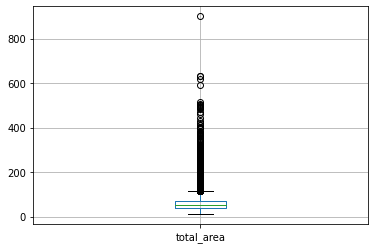

In [66]:
df.boxplot(column='total_area')

Диаграмма размаха не очень наглядная. Видим, что есть выбросы, и максимальное значение достигает 900 м², и на этом все. Изменим масштаб графика.

(0.0, 150.0)

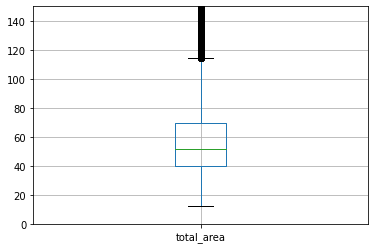

In [67]:
df.boxplot(column='total_area')
plt.ylim(0, 150)

Теперь можно увидеть, что большая часть значений лежит в диапазоне примерно до 70 м². Мы обратились к сайту Яндекс.Недвижимости и обнаружили объявления с квартирами больших метражей, однако их количество значительно меньше, что ожидаемо. Относить к аномалиям большой метраж не станем, а соответственно и удалять. 

#### living_area

In [68]:
#Узнаем разброс значений, среднюю стоимость и медиану столбца
df['living_area'].describe()

count    23542.000000
mean        34.565282
std         22.352728
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

(0.0, 150.0)

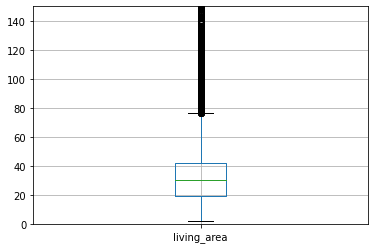

In [69]:
df.boxplot(column='living_area')
plt.ylim(0, 150)

#### kitchen_area

In [70]:
#Узнаем разброс значений, среднюю стоимость и медиану столбца
df['kitchen_area'].describe()

count    23542.000000
mean        10.454805
std          6.050171
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

(0.0, 30.0)

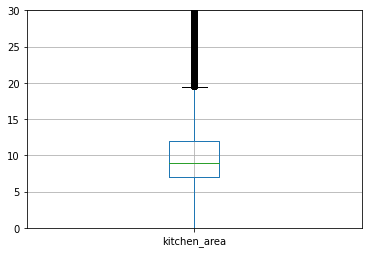

In [71]:
df.boxplot(column='kitchen_area')
plt.ylim(0, 30)

#### rooms

In [72]:
#Узнаем разброс значений, среднюю стоимость и медиану столбца
df['rooms'].describe()

count    23542.000000
mean         2.070767
std          1.078817
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

(0.0, 20.0)

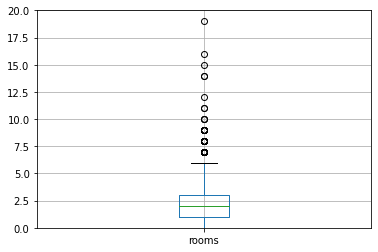

In [73]:
df.boxplot(column='rooms')
plt.ylim(0, 20)

#### floors_total

In [74]:
#Узнаем разброс значений, среднюю стоимость и медиану столбца
df['floors_total'].describe()

count    23542.000000
mean        10.677300
std          6.593295
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

В самом высоком жилом здании в Санкт-Петербурге количество этажей равно 37. Рассмотрим значения столбца подробнее.

(0.0, 40.0)

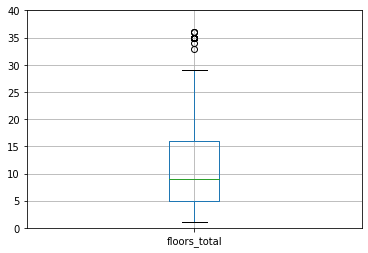

In [75]:
df.boxplot(column='floors_total')
plt.ylim(0, 40)

In [76]:
#Удалим все значения в столбце больше 37
df = df.loc[df['floors_total'] <= 37]

In [77]:
#проверим, сколько стро было удалено
df['floors_total'].describe()

count    23540.000000
mean        10.673449
std          6.580222
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

### Посчитайте и добавьте в таблицу новые столбцы

В данном разделе мы добавим в таблицу новые столбцы со следующими параметрами:
* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах.

In [78]:
#посчитаем цену квадратного метра
df['price_per_square_meter'] = df['last_price'] / df['total_area']
#для удобства просмотра приведем к типу int
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')

In [79]:
#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи с помощью функции  
df['floor_category'] = df.apply(floor_category, axis = 1)

In [80]:
#добавим столбец с расстоянием до центра города в км с округлением до целых значений
df['cityCenters_nearest_km'] = round(df['cityCenters_nearest'] / 1000)

### Проведите исследовательский анализ данных

В данном разделе мы изучим следующие параметры объектов: общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков;
этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта;
расстояние до ближайшего парка; день и месяц публикации объявления.
Построим отдельные гистограммы для каждого из этих параметров, а также опишем наши наблюдения по параметрам.

#### total_area

In [81]:
#посмотрим общую информацию для интересующих нас столбцов
df[['total_area', 'living_area','kitchen_area', 'last_price', 'rooms','ceiling_height', 'floor', 'floors_total','floor_category'] ].describe() 

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total
count,23540.000000,23540.000000,23540.000000,2.354000e+04,23540.000000,23540.000000,23540.00000,23540.000000
mean,60.334827,34.566609,10.454784,6.543406e+06,2.070816,2.710634,5.87842,10.673449
std,35.670379,22.353079,6.050351,1.091598e+07,1.078840,0.276188,4.87184,6.580222
min,12.000000,2.000000,0.000000,1.219000e+04,0.000000,2.400000,1.00000,1.000000
25%,40.000000,19.000000,7.000000,3.407500e+06,1.000000,2.550000,2.00000,5.000000
50%,52.000000,30.000000,9.000000,4.650000e+06,2.000000,2.650000,4.00000,9.000000
75%,69.702500,42.100000,12.000000,6.799000e+06,3.000000,2.750000,8.00000,16.000000
max,900.000000,409.700000,112.000000,7.630000e+08,19.000000,14.850000,33.00000,36.000000


* По площади есть как квартира 12 м², так и 900 м², но, как мы писали выше, среднее значение выглядит более-менее реалистичным; 
* Аналогично можно сказать и о данных в столбцах living_area, kitchen_area; 
* Стоимость жилья указана, вероятно, в у.е. По цене за квартиру - есть варианты на любой бюджет от 12 тысяч рублей до 763 млн рублей;
* Число комнат начинается от 0 ( т.е. студия) до 19;
* Продаваемые квартиры расположены на этажах от 1 до 33, при этом после очистки данных максимальное количество этажей стало составлять 36;
* Высота потолков после очистки данных - от 2.4 до 10 м.

#### total_area

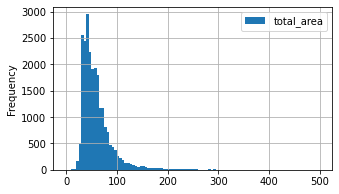

In [82]:
df.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500));

Общая площадь в нашей выборке колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. 

#### living_area

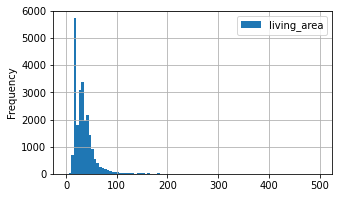

In [83]:
df.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500));

Жилая площадь в нашей выборке колеблется от 34 до 409 м2, среднее значение 34, а медиана 30 м2. Ожидаемо, что жилая площадь большинства квартир доходит примерно до 50 м2. 

#### kitchen_area

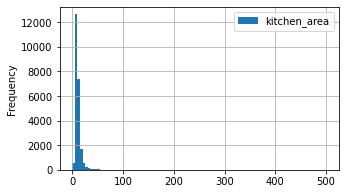

In [84]:
df.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500));

Площадь кухни в нашей выборке колеблется от 1 до 112 м2, среднее значение 10, а медиана 9 м2. 

#### last_price

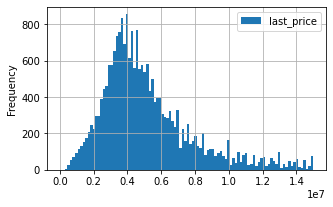

In [85]:
df.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, range = (0,15000000), figsize = (5,3));

Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. 

#### rooms

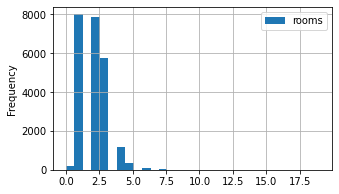

In [86]:
df.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3));

Количество комнат колеблется от 1 до 19. Больше всего однокомнатных квартир. 

#### ceiling_height

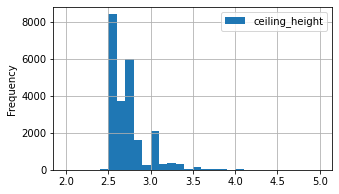

In [87]:
df.plot(y = 'ceiling_height', kind = 'hist', bins = 30, range = (2,5), grid=True, figsize = (5,3));

Высота потолков в среднем составляет 2,7 м, медиана 2,65 м. 

#### floor

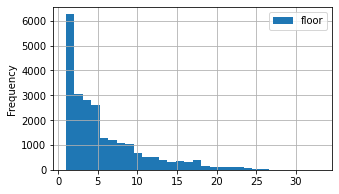

In [88]:
df.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (5,3));

Квартиры могут находится как на 1, так и на 33 этаже, однако большая часть квартир расположена с 1 по 10 этаж. 

#### floor_category

In [89]:
df['floor_category'].describe()

count      23540
unique         3
top       другой
freq       17310
Name: floor_category, dtype: object

Реже всего квартиры расположены на 1 или последнем этаже.  

#### floors_total

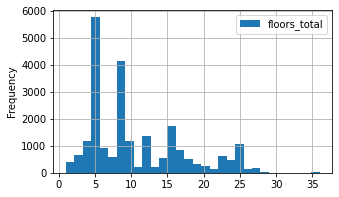

In [90]:
df.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,3));

Минимальное количество этажей в домах, в которых расположены квартиры на продажу, 1, а максимальное — 36. Пики значений приходятся на дома этажностью 5, 9, 15 и 25, что не представляется необычным. 

 #### cityCenters_nearest 

In [91]:
df['cityCenters_nearest'].describe().to_frame()

,cityCenters_nearest
count,18054.000000
mean,14190.205605
std,8610.902203
min,181.000000
25%,9238.000000
50%,13095.000000
75%,16285.000000
max,65968.000000


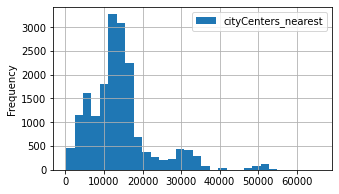

In [92]:
df.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3));

Большинство объектов недвижимости находятся в пределах 10-20 км от центра, т.е. приходится на спальные районе. В среднем квартиры удалены на 13-14 км от центра. 

#### airports_nearest

In [93]:
df['airports_nearest'].describe().to_frame()

,airports_nearest
count,18031.000000
mean,28794.729244
std,12630.715605
min,0.000000
25%,18557.000000
50%,26756.000000
75%,37273.000000
max,84869.000000


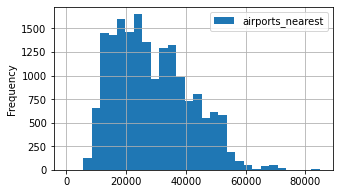

In [94]:
df.plot(y = 'airports_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3));

В среднем квартиры удалены от Пулково на расстоянии почти 29 км, однако есть и более удаленные объекты. 

#### parks_nearest

In [95]:
df['parks_nearest'].describe().to_frame()

,parks_nearest
count,8023.000000
mean,490.513399
std,341.651458
min,1.000000
25%,288.000000
50%,455.000000
75%,612.000000
max,3190.000000


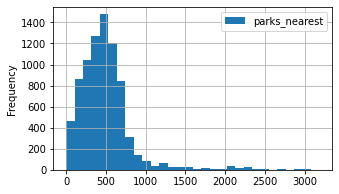

In [96]:
df.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3));

В среднем квартиры находятся в 341-455 м от близлежащего парка.  

#### день и месяц публикации объявления


In [97]:
df[['month_exposition', 'day_of_the_week_exposition']].describe()

,month_exposition,day_of_the_week_exposition
count,23540.000000,23540.000000
mean,6.401487,2.567715
std,3.492903,1.788169
min,1.000000,0.000000
25%,3.000000,1.000000
50%,6.000000,3.000000
75%,10.000000,4.000000
max,12.000000,6.000000


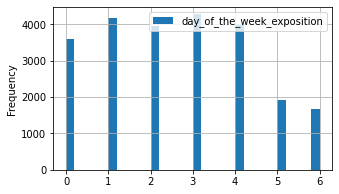

In [98]:
df.plot(y = 'day_of_the_week_exposition', kind = 'hist', bins = 30, grid=True, figsize = (5,3));

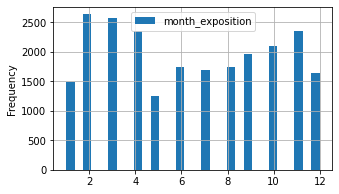

In [99]:
df.plot(y = 'month_exposition', kind = 'hist', bins = 30, grid=True, figsize = (5,3));

В среднем объявление о продаже квартир выкладывают по вторникам, четвергам и пятницам. Судя по гистограмме, чаще всего публикуют объявления о продаже в январе, феврале, марте, апреле и ноябре.  

Вывод:
* средняя квартира, выставленная на продажу в июле, обладает следующими характеристиками: это 2-комнатная квартира площадью 52м² с потолками 2,65 м  на 4-5 этаже в доме небольшой этажности в спальном районе города, проданная за 3 месяца (95 дней) по стоимости 4,65 млн рублей.  

### Задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). 

Данный параметр показывает, сколько дней «висело» каждое объявление. Сначала построим гистограмму, затем посчитаем среднее и медиану. После опишем, сколько обычно занимает продажа, а также, какие продажи можно считать быстрыми, а какие — необычно долгими. 

In [100]:
#посмотрим информацию по столбцу days_exposition
df['days_exposition'].describe().to_frame()

,days_exposition
count,20373.000000
mean,180.808619
std,219.811227
min,1.000000
25%,45.000000
50%,95.000000
75%,231.000000
max,1580.000000


Согласно данным, среднее значение, т.е. среднее время продажи — 180 дней, а медиана — 95 дней. Медиана меньше среднего почти в два раза, что может говорить о наличии выбросов.

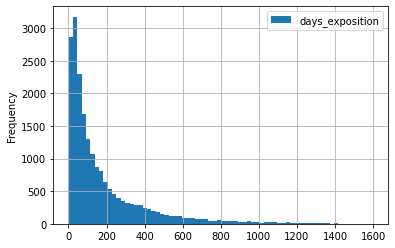

In [101]:
#построим гистограмму для столбца days_exposition
df.plot(y = 'days_exposition', kind = 'hist', bins = 70, grid = True, range = (1,1600));

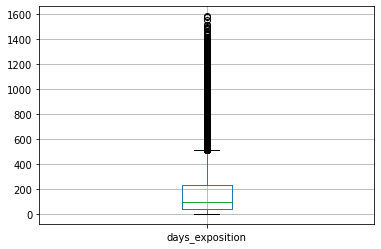

In [102]:
#построим диаграмму размаха для столбца days_exposition 
df.boxplot(column='days_exposition');

Наблюдаем выбросы, поэтому ограничим срок продажи 500 днями. 

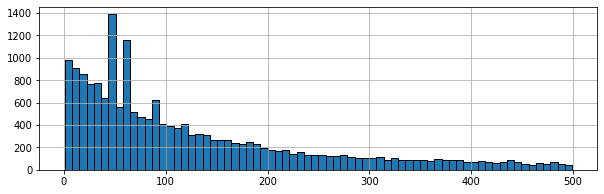

In [103]:
df.query('days_exposition<500')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black');

Судя по гистограмме, больше всего квартир продается примерно на 45-50 и 60 день. Посмотрим поближе.

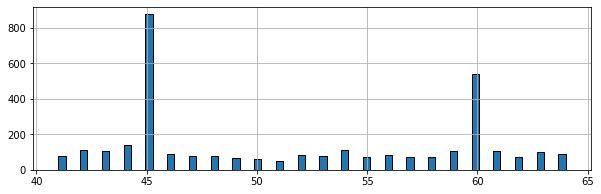

In [104]:
df.query('40<days_exposition<65')['days_exposition'].hist(bins=70, figsize=(10,3), ec='black');

По правилам Яндекс.Недвижимости объявления автоматически снимаются с публикции как раз на 45й и 60й день, в зависимости от типа. Так что здесь также будет оправданным удаление этих продаж из среза, так как они искажают картину с реально проданными квартирами.

На основе полученных данных можно сделать следующие выводы относительно срока продажи объектов недвижимости. 
Как правило, продажа недвижимости занимала 95 дней, то есть около 3 месяцев. При этом четверть всех квартир была продана в течение 45 дней с момента публикации объявления. Если объект был продан в течение месяца, то необходимо проверить данную сделку на предмет мошенничества. Такая проверка особенна критична, если срок сделки не превышает двух недель. Кроме того, если объект был продан только после 14 месяцев (428 дней) с момента публикации, это говорит об аномально долгой продаже.

### Задание: Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучим, зависит ли цена от: общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год). Затем построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией мы будем использовать сводные таблицы.

#### Зависимость цены объекта недвижимости от общей площади квартиры

In [110]:
#сделаем сводную таблицу для столбцов total_area и last_price
pt_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_total_area.columns = ['mean', 'count', 'median']
pt_total_area

,mean,count,median
total_area,,,
12.0,2400000.0,1,2400000.0
13.0,2350000.0,3,1850000.0
13.2,1686000.0,1,1686000.0
14.0,1190000.0,1,1190000.0
15.0,1725000.0,2,1725000.0
...,...,...,...
590.0,65000000.0,1,65000000.0
618.0,300000000.0,1,300000000.0
631.0,140000000.0,1,140000000.0


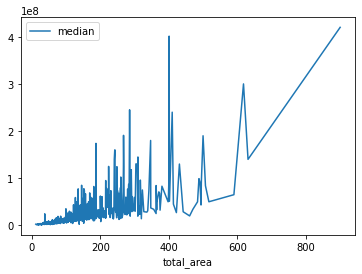

In [111]:
#сделаем для столбцов total_area и last_price диаграмму рассеяния
pt_total_area.plot(y = 'median');

По диаграмме рассеяния видно, что в самой "густой зоне" квартиры площадью от 12 до 200 м² и стоимость составляет от 0.1 до 1 у.е. Найдем коэффициент корреляции Пирсона. 

In [112]:
df['total_area'].corr(df['last_price'])

0.6536034114684435

Корреляция в 0.65 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение метража сопровождается прибавкой в стоимости, но так бывает не всегда.

#### Зависимость цены объекта недвижимости от жилой площади квартиры

In [113]:
#сделаем сводную таблицу для столбцов living_area и last_price
pt_living_area = df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_living_area.columns = ['mean', 'count', 'median']
pt_living_area

,mean,count,median
living_area,,,
2.000000,4340000.0,2,4340000.0
3.000000,34715000.0,2,34715000.0
5.000000,2680000.0,1,2680000.0
5.400000,6100000.0,1,6100000.0
6.000000,3799000.0,1,3799000.0
...,...,...,...
332.000000,50000000.0,1,50000000.0
347.500000,91500000.0,1,91500000.0
356.482163,140000000.0,1,140000000.0


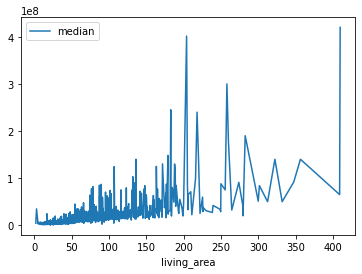

In [114]:
#сделаем для столбцов living_area и last_price диаграмму рассеяния
pt_living_area.plot(y = 'median');

In [115]:
#найдем коэффициент корреляции 
df['living_area'].corr(df['last_price'])

0.5855720840771869

Корреляция в 0.58 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение метража жилой площади сопровождается прибавкой в стоимости, но так бывает не всегда.

#### Зависимость цены объекта недвижимости от площади кухни

In [116]:
pt_kitchen_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_kitchen_area.columns = ['mean', 'count', 'median']
pt_kitchen_area

,mean,count,median
kitchen_area,,,
0.000000,3025000.0,2,3025000.0
0.106960,2950000.0,1,2950000.0
0.673451,13351000.0,1,13351000.0
0.713066,2550000.0,1,2550000.0
0.748719,1737000.0,1,1737000.0
...,...,...,...
93.200000,82400000.0,1,82400000.0
100.000000,65000000.0,1,65000000.0
100.700000,12500000.0,1,12500000.0


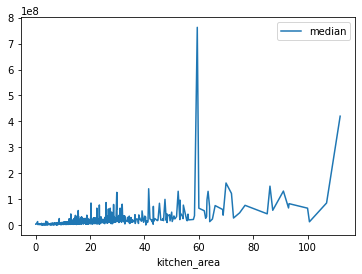

In [117]:
pt_kitchen_area.plot(y = 'median');

In [118]:
df['kitchen_area'].corr(df['last_price'])

0.5049172796541873

Корреляция в 0.51 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение метража кухни сопровождается прибавкой в стоимости, но так бывает не всегда.

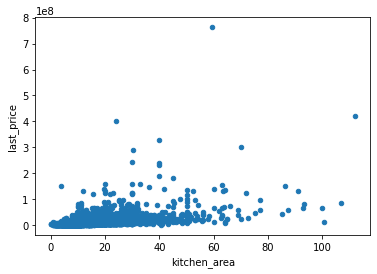

In [119]:
df.plot(kind='scatter', x='kitchen_area', y='last_price');

#### Зависимость цены объекта недвижимости от количества комнат

In [120]:
pt_rooms = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_rooms.columns = ['mean', 'count', 'median']
pt_rooms

,mean,count,median
rooms,,,
0,3.344493e+06,194,2700000
1,3.835103e+06,7995,3600000
2,5.589936e+06,7888,4770000
3,8.179325e+06,5772,6200000
4,1.341792e+07,1172,9000000
5,2.379830e+07,325,14000000
6,3.188004e+07,104,19000000
7,5.147007e+07,59,24900000
8,5.022417e+07,12,23095000


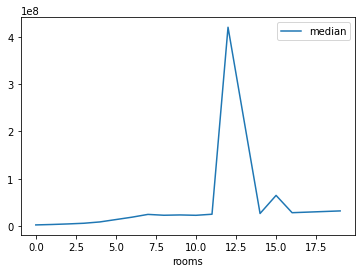

In [121]:
pt_rooms.plot(y = 'median');

In [122]:
df['rooms'].corr(df['last_price'])

0.36323426889795746

Корреляция в 0.36 говорит о практически отсутствующей связи между количество комнат и стоимостью квартир. Однако мы наблюдаем рост стоимости, когда количество комнат превышает 10.

#### Зависимость цены объекта недвижимости от этажа, на котором расположена квартира (первый, последний, другой)

In [123]:
pt_floor_category = df.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_floor_category.columns = ['mean', 'count', 'median']
pt_floor_category

,mean,count,median
floor_category,,,
другой,6.676610e+06,17310,4850000
первый,4.808224e+06,2903,3900000
последний,7.364406e+06,3327,4300000


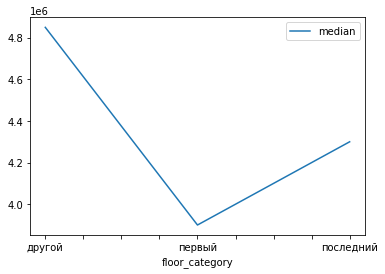

In [124]:
pt_floor_category.plot(y = 'median');

Значения соотносятся с информацией о факторах, влияющих на рыночную стоимость жилья. Расположение на 1-ом этаже или крайнем верхнем этаже в целом снижают его стоимость.

#### Зависимость цены объекта недвижимости от даты размещения (день недели, месяц, год).

In [125]:
pt_weekday = df.pivot_table(index = 'day_of_the_week_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_weekday.columns = ['mean', 'count', 'median']
pt_weekday 

,mean,count,median
day_of_the_week_exposition,,,
0,6.524394e+06,3590,4650000
1,6.389475e+06,4159,4720000
2,6.632348e+06,3945,4700000
3,6.714394e+06,4268,4650000
4,6.360760e+06,3979,4550000
5,6.986165e+06,1919,4550000
6,6.248701e+06,1680,4550000


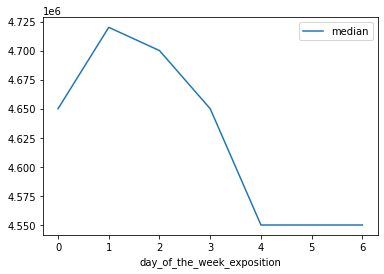

In [126]:
pt_weekday.plot(y = 'median');

In [127]:
df['day_of_the_week_exposition'].corr(df['last_price']);

Наблюдаем крайней низкую корелляцию, значит, сильной зависимости от дня недели нет. Однако видим, что стоимость жилья, выставленного на продажу во вторник и среду выше, чем в другие дни. Спад приходится на выходные. 

In [128]:
pt_month = df.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_month.columns = ['mean', 'count', 'median'] 
pt_month

,mean,count,median
month_exposition,,,
1,6.668903e+06,1485,4600000
2,6.465476e+06,2633,4650000
3,6.358920e+06,2573,4650000
4,6.745325e+06,2355,4800000
5,6.598460e+06,1259,4500000
6,6.322389e+06,1744,4400000
7,6.644217e+06,1684,4650000
8,6.348572e+06,1738,4570000
9,6.842660e+06,1970,4700000


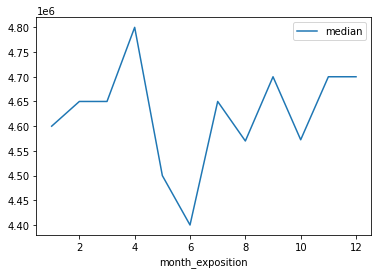

In [129]:
pt_month.plot(y = 'median');

In [130]:
df['month_exposition'].corr(df['last_price'])

0.0028136808301299763

Наблюдаем крайней низкую корелляцию. Тем не менее наблюдаем, что самая высокая стоимость метра в апреле и августе. Рынку недвижимости свойственна сезонность. Традиционно ближе к лету и летом дела идут хуже: многие уезжают в отпуск и откладывают решение квартирного вопроса до сентября.

In [131]:
pt_year = df.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pt_year.columns = ['mean', 'count', 'median']    
pt_year

,mean,count,median
year_exposition,,,
2014,1.204660e+07,136,7640000
2015,8.595669e+06,1166,5300500
2016,6.833671e+06,2742,4550000
2017,6.585482e+06,8155,4500000
2018,5.958914e+06,8472,4575000
2019,6.777427e+06,2869,5050000


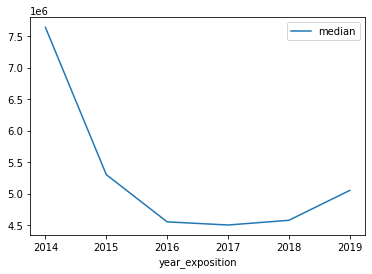

In [132]:
pt_year.plot(y = 'median');

In [133]:
df['year_exposition'].corr(df['last_price'])

-0.04289446130961924

Наблюдаем отрицательную корелляцию. Тем не менее с 2014 г. действительно наблюдался спад стоимости на жилье, связанный с падением цен на нефть и рубля, антироссийскими экономическими санкциями, введением контрсанкций. 

### Населенные пункты с самой высокой и низкой стоимостью квадратного метра

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [134]:
local_pivot_table = df.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
local_pivot_table.columns = ['count', 'mean']
local_pivot_table = local_pivot_table.sort_values('count', ascending = False).head(10)
local_pivot_table

,count,mean
locality_name,,
Санкт-Петербург,15643,114875.970210
поселок Мурино,552,85629.110507
поселок Шушары,439,78550.883827
Всеволожск,397,68718.853904
Пушкин,369,103125.373984
Колпино,338,75424.150888
поселок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


In [135]:
#самая высокая стоимость
local_pivot_table[local_pivot_table['mean']==local_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15643,114875.97021


In [136]:
#самая низкая стоимость
local_pivot_table[local_pivot_table['mean']==local_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,235,58237.723404


Ожидаемо, населённый пункт с самой высокой стоимостью квадратного метра — Санкт-Петербург. Выборг — город с самой низкой стоимостью жилья. 

### Средняя цена каждого км в СПб

Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

In [137]:
#сделаем срез по срез locality_name и запишем его в другую область памяти, чтобы не влиять на изначальный датасет
df_spb = df[(df['locality_name']=='Санкт-Петербург')].copy()

In [139]:
pt_spb_price_per_square_meter = df.pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = ['mean', 'median'])
pt_spb_price_per_square_meter.columns = ['mean', 'median']
pt_spb_price_per_square_meter.head(20)

,mean,median
cityCenters_nearest_km,,
0.0,245833.111111,172619.0
1.0,177004.963542,128484.5
2.0,157848.564516,123035.0
3.0,121507.367816,108468.5
4.0,133282.422965,117951.5
5.0,140453.507104,126932.0
6.0,151011.750809,131835.0
7.0,156176.445238,127016.5
8.0,125626.305228,122619.0


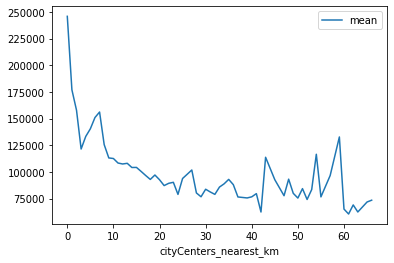

In [140]:
pt_spb_price_per_square_meter.plot(y = 'mean');

Cтоимость объектов зависит от расстояния до центра города: чем ближе объект недвижимости к центру города, тем его стоимость выше. 

### Общий вывод

Мы провели работу с архивом данных по объектам недвижимости. Сначала мы поэтапно осуществили предобработку данных, а затем посчитали и добавили в исходную таблицу стоимость запрашиваемых признаков. 

Изучая сроки продажи квартир мы выявили, что средний срок продажи составлял 95 дней, т.е. около 3 месяцев. При этом были выявлены всплески показателей на 45 и 60 дней, что могло быть связано как с тем, что квартиры действительно продавались к этому сроку, так и с тем, что объявления могли быть автоматически сняты с Яндекс Недвижимость. При помощи диаграммы размаха было выявлено, что нормальные значения продажи квартир варьируются от 1 до 500 дней. Если объект был продан в течение месяца, то необходимо проверить данную сделку на предмет мошенничества. Такая проверка особенна критична, если срок сделки не превышает двух недель. Кроме того, если объект был продан только после 14 месяцев (428 дней) с момента публикации, это говорит об аномально долгой продаже. Здесь стоит отметить, что, чем ближе дата публикации объявления к текущему году, тем больше пропусков. 

Мы выявили, что на стоимость квартиры больше всего влияет общая площадь (относительно других запрашиваемых признаков). Стоит отметить, что на ценообразование влияют и другие факторы, неучтенные в датафрейме. Кроме характеристик непосредственно самой квартиры, влияет расположение дома, тип и год постройки здания, класс жилья, экология, инфраструктура в самом жилищном комплексе и вокруг него. Стоит также отметить, что в 2014-2018 гг наблюдался спад в стоимости квартир в среднем в связи с рядом политико-экономических причин. Если говорить о квартирах в Санкт-Петербурге, то удаленность от центра также оказывает значимое влияние на стоимость жилья. 

Если говорить о типичном "портрете" квартиры, то можно сделать следующие наблюдения: это 1-комнатная квартира площадью 52м² с потолками 2,65 м  на 4-5 этаже в доме небольшой этажности в спальном районе города, проданная за 3 месяца (95 дней) по стоимости 4,65 млн рублей. Она находится в пешей доступности от парка. Жилая площать составляет около 30 м2, а кухня 10 м2.

Мы также обратились к топ-10 населенных пунктов с наибольшим количеством объявлений. Лидером по самой высокой стоимости жилья ожидаемо стал Санкт-Петербург, а закрыл десятку Выборг. При этом нужно отметить, что остальные населеные пункты находятся в непосредственной близости к городу. 